# Titanic Data Science Solutions
## Workflow stage

For this project, I would like to follow the workflow below.

1. Question or problem definition
2. Acquire training and testing data
3. Wrangle, prepare, cleanse the data
4. Analyze, identify patterns, and explore the data
5. Model, predict and solve the problem
6. Visualize, report, and present the problem solving steps and final solution
7. Supply or submit the results.

## Question or problem definition
> Knowing from a training set of smaples listing passengers who survied or did not survie the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survied or not.


We may also want to develop some early understanding about the domain of our problem. Here are the highlights to note.
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwrek led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involving in surviving the sinking, some groups of people were more likely to survie than others, such as women, children, and the upper class.

## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal

**Correlation.** One can approach the problem based on availavle features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? At the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

**Completing** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly inaccurate values within features and try to correct these values or exclude the samples containing errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.



## Acquire training and test data

In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random
import math
from scipy.stats import pearsonr

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [64]:
# Check which features are available
print(f"We have {len(train_df.columns)} features including \"Survied\" itself")
print(train_df.columns.values)

We have 12 features including "Survied" itself
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


We can mainly divide into two types, Categorical and Numerical.

- Categorical : Survied, Pclass, sex, Embarked
- Numerical : Age, Sibsp, Parch, Fare

- Unique Value: PassengerId, Name, Ticket

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_df.info()   
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [67]:
def null_val_summary(df):
    for column in df.columns:
        if df[column].isna().sum() != 0:
            print(f"{column}  {df[column].isna().sum()}/{df.shape[0]} ~ {round(df[column].isna().sum() / df.shape[0],2) * 100} %" )
null_val_summary(train_df)
print('-' * 40)
null_val_summary(test_df)

Age  177/891 ~ 20.0 %
Cabin  687/891 ~ 77.0 %
Embarked  2/891 ~ 0.0 %
----------------------------------------
Age  86/418 ~ 21.0 %
Fare  1/418 ~ 0.0 %
Cabin  327/418 ~ 78.0 %


In [68]:
# distribution of numerical feature
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Assumption based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions

**Correlating.** 
We want to know how well does each feature correlate with Survival.

**Completing.**
1. We may want to complete Age feature as it is definitely correlated to survival
2. We may want to complete the embarked feature as it may also correlate survival or another important feature

**Correcting.**
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates(22%) and there may not be a correlation
2. Cabin feature may be dropped as it is highly incomplete
3. PassengerID may be dropped from training dataset as it does not contribute to survival
4. Name may be dropped from training dataset as it does not contribute to survival

**Creating.**
1. We may want to create a new feature called Family based on Parch and Sibsp to get total count of family members on board
2. We may want to engineer the name feature to extract title as a new feature
3. We may want to create new feature for age bands, This turns a continuous numerical feature into an ordinal cat feature
4. We may also want to create a fare range feature if it helps our analysis

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.
1. Women (sex = female) were more likely to have survived.
2. Children were more likely to have survied
3. The uppder class passengers (Pclass = 1) were more likely to have survived.




## Analyze by pivoting features

To confim some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. we can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are catoegorical (sex), Ordinal(Pclass), or discrete (Sibsp, Parch) type

- **Pclass** We observe significant correlation (>0.5) among Pclass = 1 and Survived (classifying #3). We decided to include this feature in our model.
- **sex** We confirm the observation during problem definition that Sex = Femal had very high survival rate at 74%
- **sibSP and parch** These features have zero coorelation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1)

Pearsons correlation: -0.994


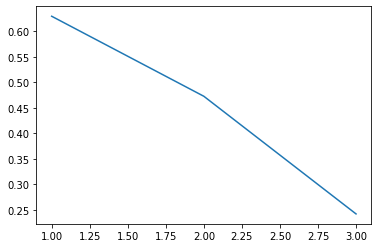

In [83]:
train_df['Pclass'].value_counts(normalize= True)
a = train_df.groupby(by = 'Pclass').mean()['Survived'].to_frame()
data1 = list(a.index)
data2 = a['Survived'].values
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)